@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software} 
        }

In [1]:
# General-level imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Special-case libraries/modules
import piecewise_regression

# Personal/local libraries and module imports
import reg

In [2]:
path = f"data{os.sep}"
filenames = ["phys_data_2023-03-12_side0.csv",
            "simulated_event_profiles.csv",
            "solo_ept_sun_e.csv"]

index_col_names = ["TimeUTC",
                  "datetime",
                  "datetime"]

index = 0

df = pd.read_csv(f"{path}{filenames[index]}", parse_dates=True, index_col=index_col_names[index])

In [3]:
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,E1,E2,E3,E4,E5,E6,E7,DT,PA
TimeUTC,,,,,,,,,,,,,,,,,,
2023-03-12 00:00:00,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,11.40,0.0,0.0,0.000,0.000,0.00,86.490453
2023-03-12 00:00:24,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0144,167.0,0.0,7.58,0.0,0.0,0.000,0.000,0.00,81.321720
2023-03-12 00:00:48,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,0.00,0.0,0.0,0.627,0.000,0.00,69.690026
2023-03-12 00:01:12,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,112.0,17.6,0.00,0.0,0.0,0.313,0.000,0.00,70.727876
2023-03-12 00:01:36,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,55.8,0.0,0.00,0.0,0.0,0.000,0.000,0.00,68.520445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 23:58:00,61.2,7.14,3.95,3.42,1.590,0.000,0.142,0.0671,0.0144,7090.0,2200.0,865.00,325.0,10.5,0.314,0.000,1.29,100.899747
2023-03-14 23:58:24,24.5,14.30,9.88,5.70,1.590,0.954,0.142,0.0671,0.0000,5030.0,1920.0,819.00,309.0,21.0,0.000,0.088,1.12,84.530333
2023-03-14 23:58:48,61.2,21.40,9.89,2.28,1.590,0.000,0.142,0.0671,0.0000,6480.0,2360.0,895.00,262.0,16.8,0.314,0.000,1.46,95.456014


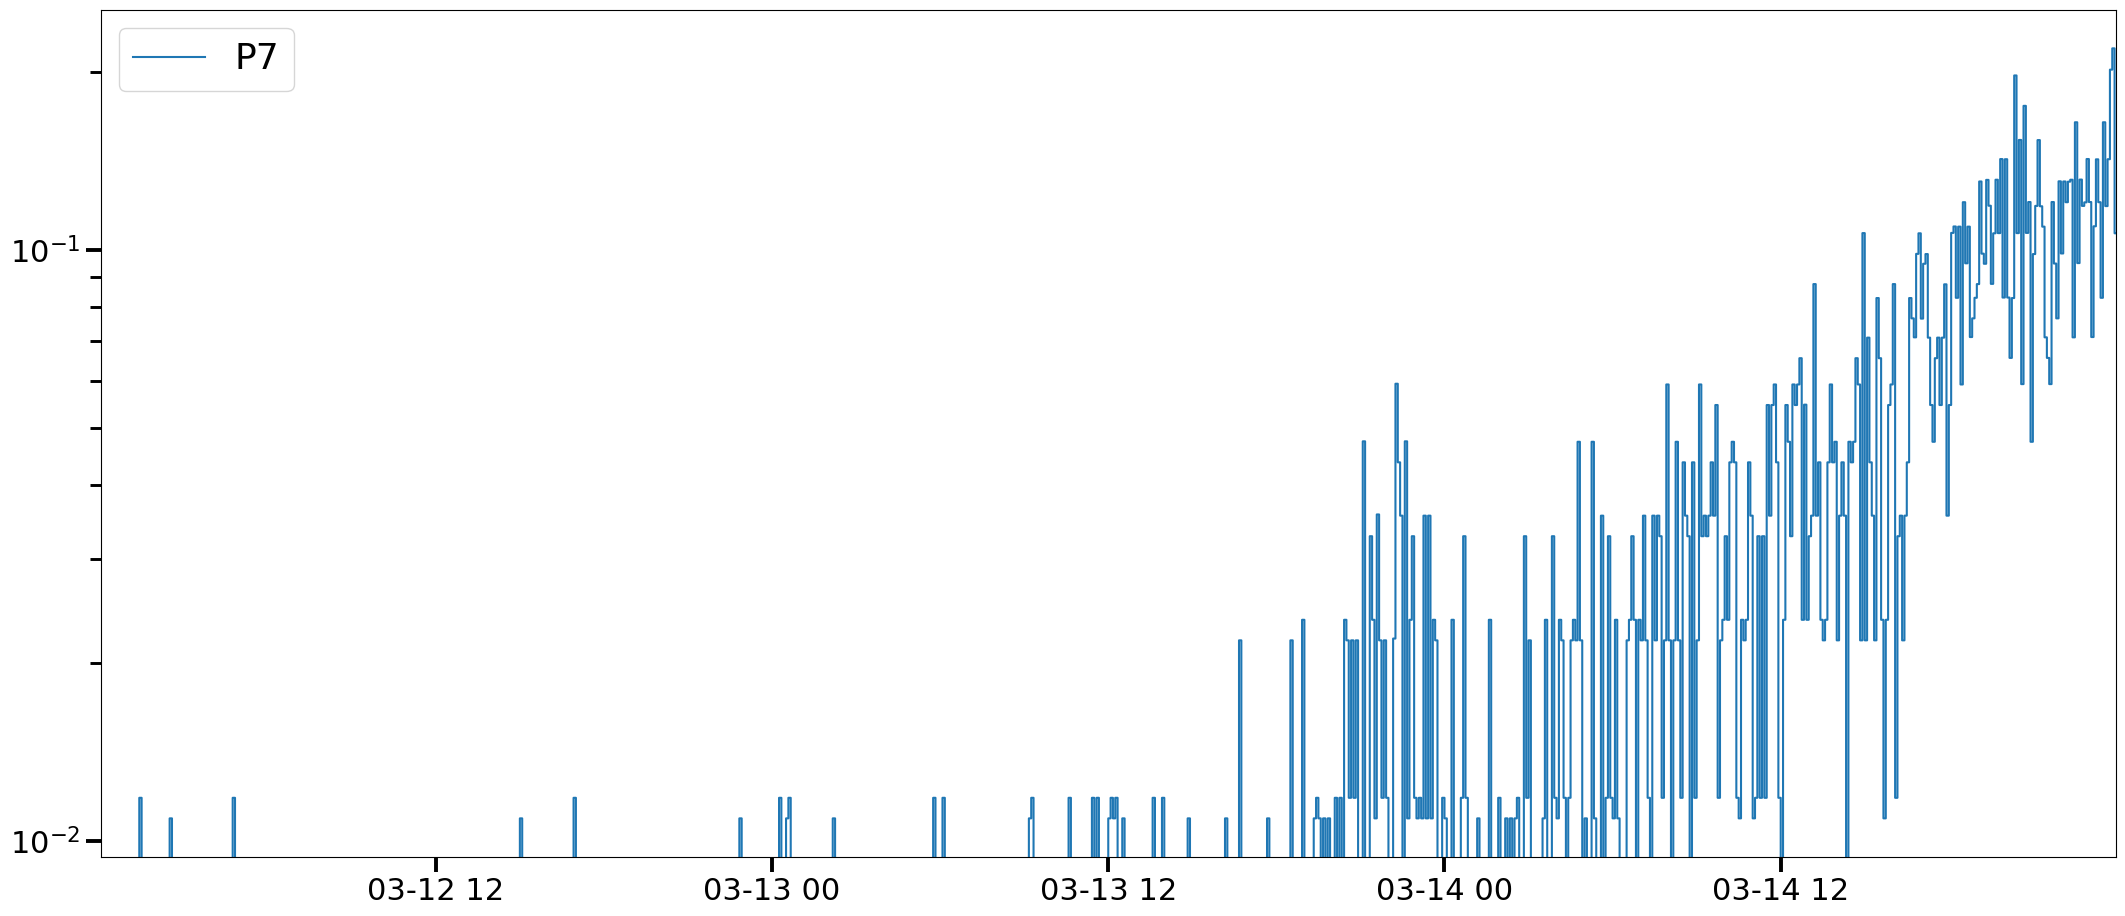

In [4]:
channel = "P7"
reg.quicklook(data=df, channel=channel, resample="5 min")

In [7]:
results = reg.workflow(data=df, channel=channel, window=100, threshold=-0.8, diagnostics=True,
                              index_choice="counting_numbers", resample="5 min")

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [False] of type bool

In [43]:
results

{'const': np.float64(1.0431977134427457),
 'slope1': np.float64(3.789652488902417e-05),
 'slope2': np.float64(0.0015943838065747575),
 'onset_time': Timestamp('2023-03-13 04:23:36'),
 'onset_time_error_minus': Timestamp('2023-03-13 04:14:24'),
 'onset_time_error_plus': Timestamp('2023-03-13 04:32:48'),
 'line1': 5       1.043387
 15      1.043766
 22      1.044031
 62      1.045547
 73      1.045964
           ...   
 4252    1.204334
 4254    1.204410
 4255    1.204447
 4258    1.204561
 4259    1.204599
 Length: 408, dtype: float64,
 'line2': (4261    1.204599
  4262    1.206195
  4263    1.207792
  4264    1.209388
  4265    1.210985
            ...   
  5068    2.448210
  5069    2.449807
  5070    2.451403
  5071    2.452999
  5072    2.454596
  Length: 784, dtype: float64,),
 'series': (TimeUTC
  2023-03-12 00:02:00    1.086360
  2023-03-12 00:06:00    1.086360
  2023-03-12 00:08:48    1.086360
  2023-03-12 00:24:48    1.086360
  2023-03-12 00:29:12    1.086360
                  

In [7]:
results["series"][0]

datetime
2022-01-20 00:03:00.451561    0.938937
2022-01-20 00:13:00.451561    0.938937
2022-01-20 00:18:00.451561    1.239967
2022-01-20 00:23:00.451561    1.239967
2022-01-20 00:28:00.451561    1.416058
                                ...   
2022-01-20 09:38:00.451561    3.056208
2022-01-20 09:43:00.451561    3.066042
2022-01-20 09:48:00.451561    3.094273
2022-01-20 09:53:00.451561    3.059511
2022-01-20 09:58:00.451561    3.126457
Name: E26, Length: 108, dtype: float64

Text(0, 0.5, 'log(Intensity)')

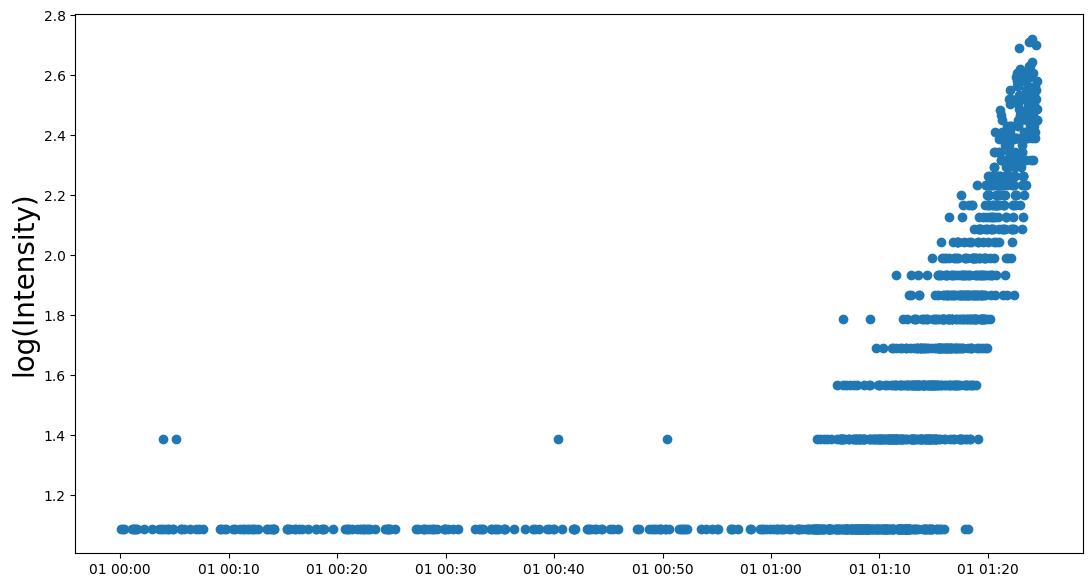

In [44]:
fig, ax = plt.subplots(figsize=(13,7))

ax.scatter(pd.to_datetime(results["indices"], unit='s'), results["series"][0].values)
ax.set_ylabel("log(Intensity)", fontsize=reg.plotting_utilities.STANDARD_AXIS_LABELSIZE)

In [45]:
tresult1 = reg.break_regression(ints=results["series"][0].values, indices=results["indices"])

In [46]:
tresult1["estimates"]

{'const': {'estimate': np.float64(1.0431977134427455),
  'se': np.float64(0.02223086359471328),
  'confidence_interval': (np.float64(0.999581585007947),
   np.float64(1.086813841877544)),
  't_stat': np.float64(46.9256495141659),
  'p_t': np.float64(9.09950009831367e-273)},
 'beta1': {'estimate': np.float64(0.0015564872816857252),
  'se': np.float64(2.900305219231934e-05),
  'confidence_interval': (np.float64(0.0014995843708279484),
   np.float64(0.001613390192543502)),
  't_stat': np.float64(53.66632695637178),
  'p_t': '-'},
 'breakpoint1': {'estimate': np.float64(4259.102055180336),
  'se': np.float64(11.72966714168747),
  'confidence_interval': (np.float64(4236.0888840379),
   np.float64(4282.115226322771)),
  't_stat': '-',
  'p_t': '-'},
 'alpha1': {'estimate': np.float64(3.7896524889024597e-05),
  'se': np.float64(6.713684214797407e-06),
  'confidence_interval': (np.float64(2.4724525891517395e-05),
   np.float64(5.10685238865318e-05)),
  't_stat': np.float64(5.644668959183116),


In [47]:
results

{'const': np.float64(1.0431977134427457),
 'slope1': np.float64(3.789652488902417e-05),
 'slope2': np.float64(0.0015943838065747575),
 'onset_time': Timestamp('2023-03-13 04:23:36'),
 'onset_time_error_minus': Timestamp('2023-03-13 04:14:24'),
 'onset_time_error_plus': Timestamp('2023-03-13 04:32:48'),
 'line1': 5       1.043387
 15      1.043766
 22      1.044031
 62      1.045547
 73      1.045964
           ...   
 4252    1.204334
 4254    1.204410
 4255    1.204447
 4258    1.204561
 4259    1.204599
 Length: 408, dtype: float64,
 'line2': (4261    1.204599
  4262    1.206195
  4263    1.207792
  4264    1.209388
  4265    1.210985
            ...   
  5068    2.448210
  5069    2.449807
  5070    2.451403
  5071    2.452999
  5072    2.454596
  Length: 784, dtype: float64,),
 'series': (TimeUTC
  2023-03-12 00:02:00    1.086360
  2023-03-12 00:06:00    1.086360
  2023-03-12 00:08:48    1.086360
  2023-03-12 00:24:48    1.086360
  2023-03-12 00:29:12    1.086360
                  

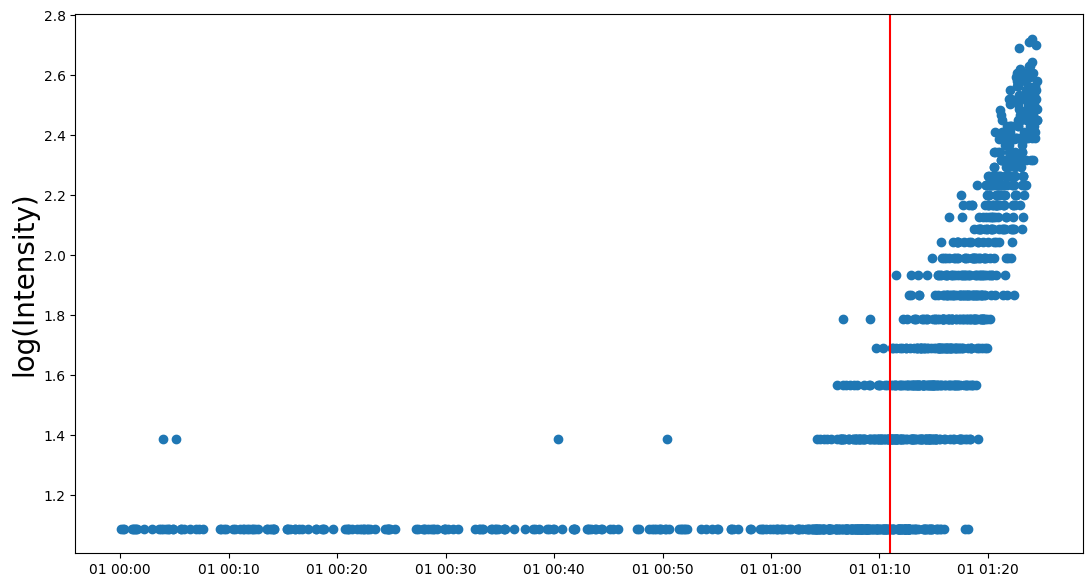

In [48]:
ax.axvline(x=pd.to_datetime(tresult1["estimates"]["breakpoint1"]["estimate"], unit='s'), color="red")

fig

In [49]:
pd.to_datetime(tresult1["estimates"]["breakpoint1"]["estimate"], unit='s')

Timestamp('1970-01-01 01:10:59.102055180')

In [50]:
fit1, fit2 = reg.calc_utilities.generate_fit_lines(indices=results["indices"],
                                                  const=tresult1["estimates"]["const"]["estimate"],
                                                  alpha1=tresult1["estimates"]["alpha1"]["estimate"],
                                                  alpha2=tresult1["estimates"]["alpha2"]["estimate"],
                                                  break_point=tresult1["estimates"]["breakpoint1"]["estimate"])

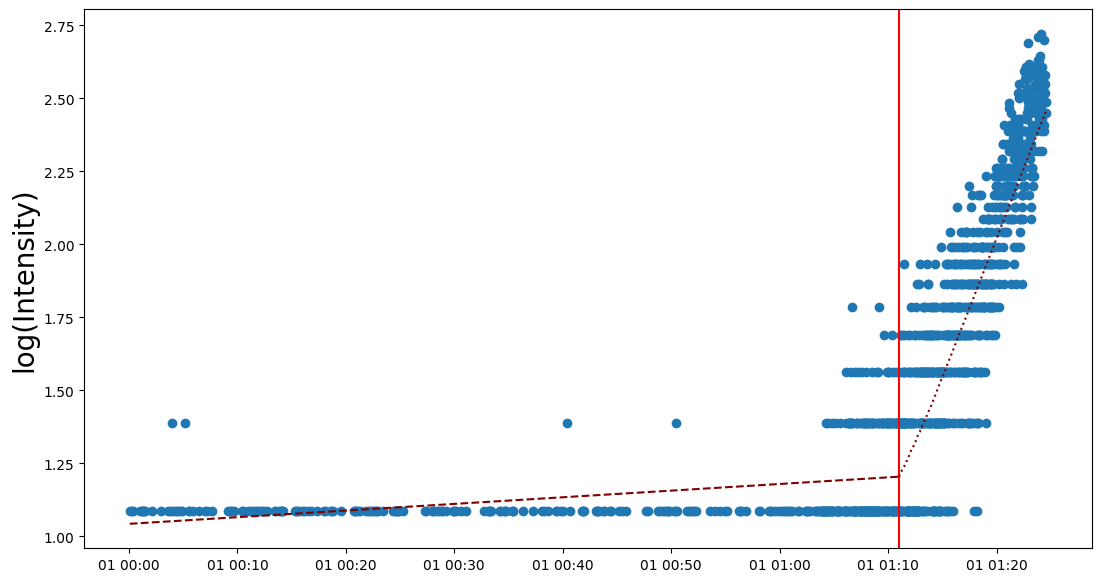

In [51]:
ax.plot(pd.to_datetime(fit1.index, unit='s'), fit1.values, color="maroon", ls="--")
ax.plot(pd.to_datetime(fit2.index, unit='s'), fit2.values, color="maroon", ls=":")

fig

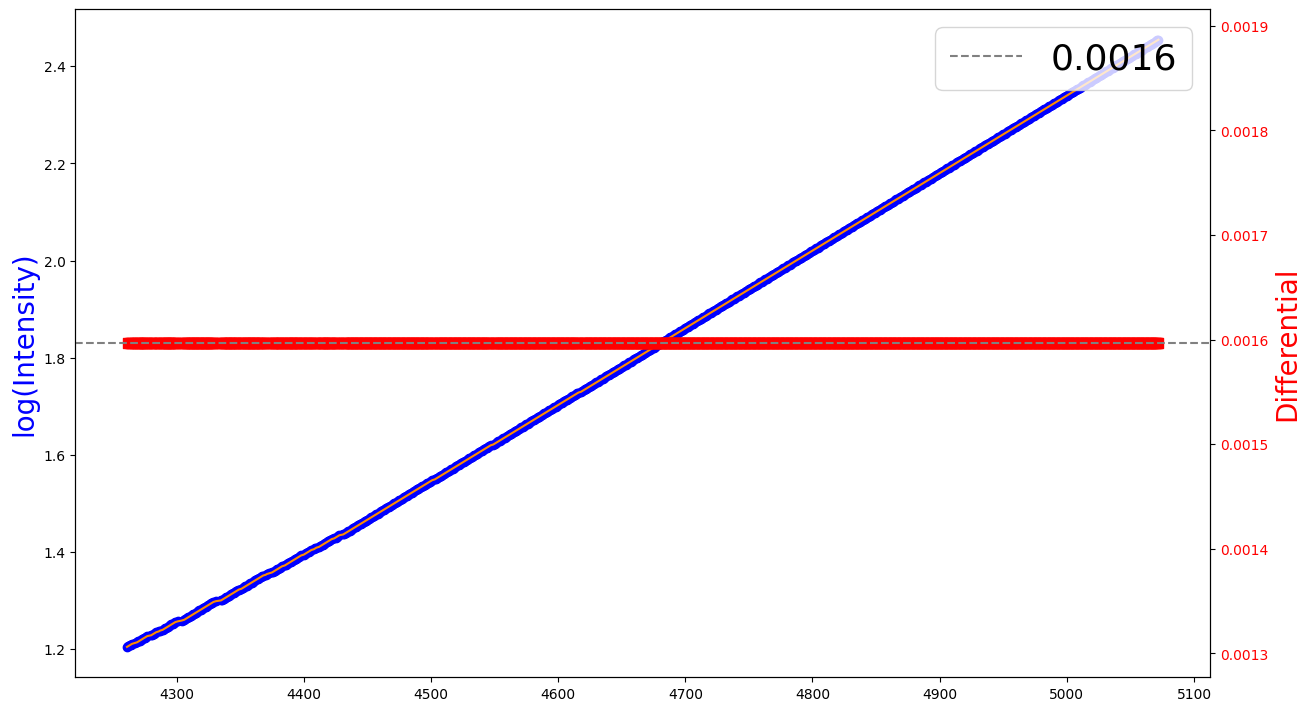

In [53]:
figg, axx = plt.subplots(figsize=(13,7), layout="constrained")

axx.scatter(fit2.index, fit2.values, color="blue", label=)
axx.plot(fit2.index, fit2.values, color="darkorange")
axx.set_ylabel("log(Intensity)", fontsize=reg.plotting_utilities.STANDARD_AXIS_LABELSIZE, color="blue")

axx.legend()

axx1 = axx.twinx()
diff2_mode = fit2.diff().mode()[0]
axx1.set_ylim([diff2_mode-diff2_mode/5, diff2_mode+diff2_mode/5])
axx1.scatter(fit2.index, fit2.diff(), s=55, marker='s', color="red")
axx1.axhline(y=diff2_mode, label=f"{np.round(diff2_mode,5)}", ls="--", color="grey")
axx1.set_ylabel("Differential", fontsize=reg.plotting_utilities.STANDARD_AXIS_LABELSIZE, color="red")
axx1.tick_params(axis='y', labelcolor="red")

axx1.legend(fontsize=reg.plotting_utilities.STANDARD_LEGENDSIZE)

plt.show()